In [2]:
!pip install tensorflow==2.7 keras gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.7 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.7


In [3]:
!gdown 1T5Cm4Tt1sO21ARz6BvStSW4yks118rRz

Downloading...
From: https://drive.google.com/uc?id=1T5Cm4Tt1sO21ARz6BvStSW4yks118rRz
To: /content/small_data_set.zip
100% 2.07G/2.07G [00:24<00:00, 85.8MB/s]


In [4]:
import zipfile
import os
import shutil
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

class ImageClassifier:
    def __init__(self, zip_file_path, dataset_folder="dataset", image_size=(150, 150), batch_size=32):
        self.zip_file_path = zip_file_path
        self.dataset_folder = dataset_folder
        self.image_size = image_size
        self.batch_size = batch_size

    def extract_zip(self):
        with zipfile.ZipFile(self.zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(self.dataset_folder)
        print("Dataset extracted successfully.")

    def prepare_data(self):
        data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

        self.train_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="training"
        )

        self.validation_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="validation"
        )
        self.num_classes = len(self.train_data.class_indices)
        print(f"Data prepared for training and validation. Number of classes: {self.num_classes}")
        

    def create_model(self):
        self.model = models.Sequential([
            layers.Conv2D(16, (3, 3), activation="relu", input_shape=(*self.image_size, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(32, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation="relu"), #Dodatkowa warstwa
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(256, (3, 3), activation="relu"), #Dodatkowa warstwa
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(512, activation="relu"),
            layers.Dense(self.num_classes, activation="softmax") 
        ])

        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
        print("Deep neural network model created and compiled.")
        plot_model(self.model, to_file="model.png", show_shapes=True)
        print("Model architecture saved as model.png")

    def train(self, epochs=10):
        self.model.fit(
            self.train_data,
            epochs=epochs,
            validation_data=self.validation_data
        )
        print("Model trained successfully.")

zip_file_path = "/content/small_data_set.zip"

classifier = ImageClassifier(zip_file_path)
classifier.extract_zip()
classifier.prepare_data()
classifier.create_model()
classifier.train()

Dataset extracted successfully.
Found 200 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Data prepared for training and validation. Number of classes: 5
Deep neural network model created and compiled.
Model architecture saved as model.png
Epoch 1/10
7/7 [==============================] - 165s 26s/step - loss: 3.0092 - accuracy: 0.1600 - val_loss: 1.6131 - val_accuracy: 0.2000
Epoch 2/10
7/7 [==============================] - 126s 18s/step - loss: 1.6115 - accuracy: 0.1900 - val_loss: 1.6101 - val_accuracy: 0.2000
Epoch 3/10
7/7 [==============================] - 125s 18s/step - loss: 1.6141 - accuracy: 0.1750 - val_loss: 1.6106 - val_accuracy: 0.2000
Epoch 4/10
7/7 [==============================] - 144s 21s/step - loss: 1.6178 - accuracy: 0.1750 - val_loss: 1.6103 - val_accuracy: 0.2000
Epoch 5/10
7/7 [==============================] - 143s 23s/step - loss: 1.6126 - accuracy: 0.1900 - val_loss: 1.6100 - val_accuracy: 0.2000
Epoch 6/10
7/7 [=====================

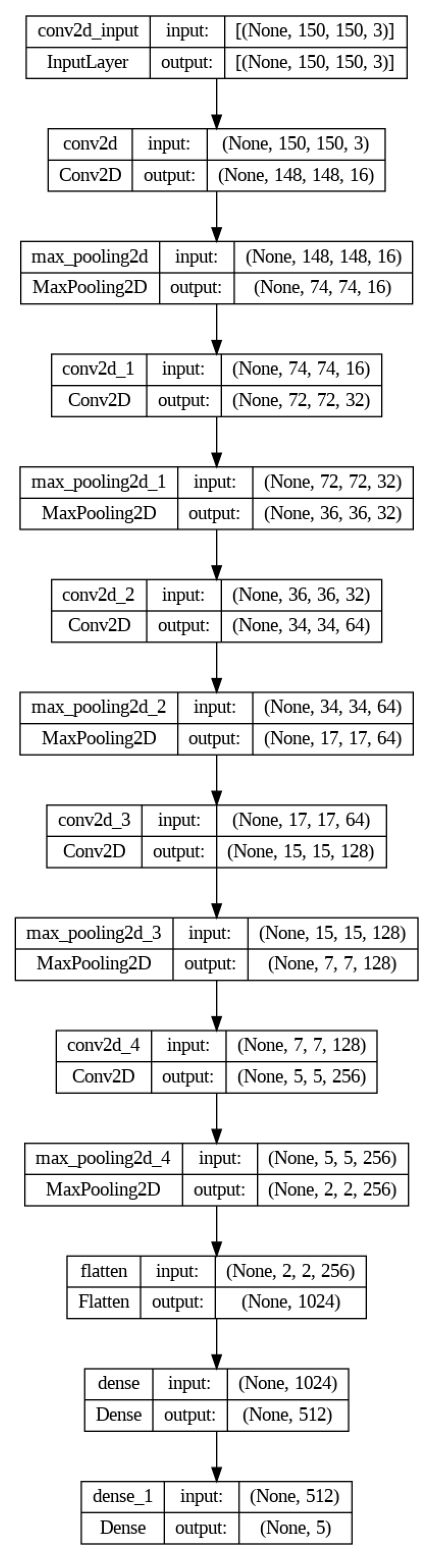

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Wczytanie obrazu modelu
img = mpimg.imread("model.png")

# Ustawienie większych wymiarów figury
fig = plt.figure(figsize=(20, 20))

# Wyświetlenie obrazu
plt.imshow(img)
plt.axis('off')
plt.show()